<a href="https://colab.research.google.com/github/aamirk2244/code-python/blob/main/movies_Category_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")



In [129]:
#import dataset
df=pd.read_csv("movies-train.csv")
df.head()

,catogory,text
0,Horror,While driving on tour late night through a lon...
1,Drama,Five young Soviet Army recruits struggle for s...
2,Drama,In a post-Taliban Afghanistan a young woman (A...
3,Documentary,"Confronted with the death of his stepfather, D..."
4,Drama,"Ivan, Julia and Kike were born and grew up in ..."


In [130]:
df[' catogory']


0            Horror
1             Drama
2             Drama
3       Documentary
4             Drama
           ...     
7478          Drama
7479         Comedy
7480         Comedy
7481          Drama
7482    Documentary
Name:  catogory, Length: 7483, dtype: object

In [131]:
df[' catogory'].value_counts()



Drama          3603
Comedy         1841
Documentary    1211
Western         432
Horror          396
Name:  catogory, dtype: int64

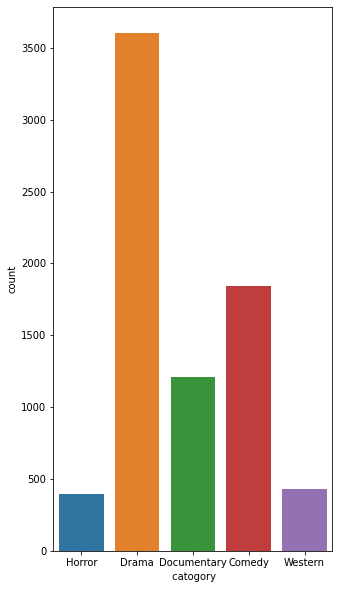

In [132]:
plt.figure(figsize=(5,10));
sns.countplot(df[' catogory']);

In [133]:

x = df.iloc[ : , -1].values
x

array(['While driving on tour late night through a lonely road in the countryside of Spain, the van of the punk band "Killer Barbys" has an accident and breaks down. A creepy old man invites the group to spend the night in the castle of Countess Von Fledermaus and presents himself as her secretary Arkan. Arkan explains that the mechanic is located 62 km far from the location and he tells that the Countess loves youths. Flavia, Rafa and Mario accept the invitation but Billy and Sharon stay shagging in the van. When the musicians meet the Countess, they find that she is the ancient artist Olga Luchan and they question how she could keep so young. But sooner they discover that the Countess needs blood of young people to keep her beauty.',
       "Five young Soviet Army recruits struggle for survival against the merciless violence that surrounds them on a daily basis. Their only means of saving their dignity is by preserving the humanity and compassion they share for each other. Visually a

In [134]:
y = df.iloc[ : ,: -1].values
y = y.flatten()               # converting to 1d

y

array(['Horror', 'Drama', 'Drama', ..., 'Comedy', 'Drama', 'Documentary'],
      dtype=object)

In [135]:
x[0:2]

array(['While driving on tour late night through a lonely road in the countryside of Spain, the van of the punk band "Killer Barbys" has an accident and breaks down. A creepy old man invites the group to spend the night in the castle of Countess Von Fledermaus and presents himself as her secretary Arkan. Arkan explains that the mechanic is located 62 km far from the location and he tells that the Countess loves youths. Flavia, Rafa and Mario accept the invitation but Billy and Sharon stay shagging in the van. When the musicians meet the Countess, they find that she is the ancient artist Olga Luchan and they question how she could keep so young. But sooner they discover that the Countess needs blood of young people to keep her beauty.',
       "Five young Soviet Army recruits struggle for survival against the merciless violence that surrounds them on a daily basis. Their only means of saving their dignity is by preserving the humanity and compassion they share for each other. Visually a

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words="english",max_features=1000)
x1=vect.fit_transform(x).todense()                    # text column
# x_mat=np.hstack((x1))

In [137]:
x1

matrix([[0, 0, 0, ..., 2, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x1,y,test_size=0.01, random_state=10)
y_train

array(['Drama', 'Western', 'Drama', ..., 'Comedy', 'Drama', 'Drama'],
      dtype=object)

In [139]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')

In [140]:
model.fit(x_train,y_train)                        # training x and y


DecisionTreeClassifier(criterion='entropy')

In [141]:
y_pred=model.predict(x_test)
x_test


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]])

In [142]:
y_pred

array(['Comedy', 'Horror', 'Documentary', 'Drama', 'Drama', 'Comedy',
       'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Documentary',
       'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama',
       'Horror', 'Comedy', 'Drama', 'Drama', 'Comedy', 'Drama', 'Horror',
       'Western', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
       'Comedy', 'Drama', 'Comedy', 'Drama', 'Documentary', 'Drama',
       'Comedy', 'Drama', 'Horror', 'Drama', 'Drama', 'Documentary',
       'Documentary', 'Comedy', 'Drama', 'Comedy', 'Documentary', 'Drama',
       'Drama', 'Drama', 'Documentary', 'Documentary', 'Comedy',
       'Documentary', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
       'Drama', 'Western', 'Comedy', 'Drama', 'Drama', 'Drama',
       'Documentary', 'Documentary', 'Comedy', 'Comedy', 'Comedy',
       'Comedy', 'Drama'], dtype=object)

**Accuracy**

In [143]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_pred,y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))



Accuracy of the model is 52.00


**Testing on Outer data set**

In [144]:
nf=pd.read_csv("movies-test.csv")
nf.head()
               

,category,text
0,Comedy,Kiki and Miki are 2 local musicians in Bulgari...
1,Documentary,A feature documentary that explores the rise o...
2,Documentary,Documentary about Brazilian filmmaker Glauber ...
3,Documentary,"A documentary alleging that the CDC, the gover..."
4,Comedy,Four high school girls at Hollywood High are l...


In [145]:

nf = nf[0:]
label = nf[' category']                    # last row  contain real class
# nf.columns
nf=nf.drop([' category'],axis=1)                   # removing the class column as we want to predict our input rows
print('this label -> ', label)

n1=vect.fit_transform(nf['text'].values).todense()                    # text column
# n1
res =  model.predict(n1)              # predicting on the basis of above trained model
print('result -> ', res)

this label ->  0            Comedy
1       Documentary
2       Documentary
3       Documentary
4            Comedy
           ...     
1342          Drama
1343          Drama
1344    Documentary
1345          Drama
1346          Drama
Name:  category, Length: 1347, dtype: object
result ->  ['Comedy' 'Comedy' 'Documentary' ... 'Drama' 'Documentary' 'Horror']


In [148]:
predictRow = 7
print('predicting the below text')     # i.e if it is horror , comedy etc
print(nf.iloc[predictRow,])             # this is the row of the text
print('Predicted Category Result -> ', res[predictRow])                       # this is the predicted result by our model
# check the predicted result in the movies-test.csv file correspond to the above given row 

predicting the below text
text    Two ruined, old adversaries meet in a rehab ce...
Name: 7, dtype: object
Predicted Category Result ->  Comedy


In [147]:
nf.head()


,text
0,Kiki and Miki are 2 local musicians in Bulgari...
1,A feature documentary that explores the rise o...
2,Documentary about Brazilian filmmaker Glauber ...
3,"A documentary alleging that the CDC, the gover..."
4,Four high school girls at Hollywood High are l...
